#### Statistics: predictions for a scootes shop bussiness growth.

Introduction.

Problem statement: Data was obtained about some users of the GoFast scooter rental service from several cities, as well as about their trips. It is necessary to analyze the data and test some hypotheses that can help the business grow.


To travel around the city, users of the GoFast service use a mobile application. The service can be used:

- without subscription: no subscription fee; the cost of one minute of travel is 8 rubles; cost of start (beginning of the trip) - 50 rubles;

- with Ultra subscription: subscription fee - 199 rubles per month; the cost of one minute of travel is 6 rubles; start-up cost is free.

The file "users_go.csv" contains information about users, their trips and subscriptions.

In the file "rides_go.csv" - information about trips

In the file "subscriptions_go.csv" - information about subscriptions

Progress:

1. Familiarize yourself with the data.
2. Pre-process the data.
3. Analyze the data and describe the main characteristics - frequency of occurrence of cities, ratio of users with and without subscription, age of users, distance traveled by the user in one trip, duration of trips.
4. Combine data about users, trips and subscriptions into one dataframe.
5. Calculation of revenue.
6. Test some hypotheses before running promotions to increase the number of subscribed users.

#### Step 1: Loading data

Let's take a look at the data.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from math import factorial  
import warnings
from datetime import date
from math import sqrt
from scipy.stats import binom, norm



In [2]:
try:
    df_rides = pd.read_csv('rides_go.csv',sep=',' )
    df_subscriptions = pd.read_csv('subscriptions_go.csv', sep=',' )
    df_users = pd.read_csv('users_go.csv',sep=',' )
except:
    df_rides = pd.read_csv('/datasets/rides_go.csv',sep=',' )
    df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',' )
    df_users = pd.read_csv('/datasets/users_go.csv', sep=',' )

Оwriting data

user_id - unique user identifier,

name - user name,

age - age

city - city

subscription_type - subscription type (free, ultra)

distance the distance the user has traveled in the current session (in meters)

duration session duration (in minutes) - the time from the moment the user pressed the “Start trip” button until the moment he pressed the “End trip” button

date - date of the trip

subscription_type - subscription type

minute_price - the cost of one minute of travel for this subscription

start_ride_price - cost of starting the trip

subscription_fee - monthly payment cost

In [3]:
display(df_rides.head(10))
display(df_users.head(10))
df_subscriptions


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
display(df_rides.info())
display(df_users.info())
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Step 2. Data preprocessing

2.1 Convert the date column to a pandas date type

In [5]:
#замена на тип даты
df_rides['date']=pd.to_datetime(df_rides['date'], format='%Y-%m-%d') 

2.2 Let's create a new column with the month number based on the date column.

In [6]:
df_rides['month_nr'] = df_rides['date'].dt.month

In [7]:
#Проверим , за какой период данные:
df_rides['date'].dt.year.unique()

array([2021])

The dataset provides data only for 2021.

2.3 Check for missing values and duplicates in dataframes

In [8]:
df_rides.duplicated().sum()

0

In [9]:
df_users.duplicated().sum()

31

We found 31 duplicates in df_users. Let's eliminate them.

In [10]:
df_users = df_users.drop_duplicates().reset_index(drop=True)
#проверка
df_users.duplicated().sum()

0

Let's check for omissions.

In [11]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month_nr    0
dtype: int64

In [13]:
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Conclusion on data quality:** In the "df_rides" dataset, the "date" column was converted to a time type. The remaining data is provided in the correct format. There are no gaps in all three dataframes.

#### Step 3: Exploratory Data Analysis

Let's describe and visualize general information about users and trips:

3.1 frequency of occurrence of cities;

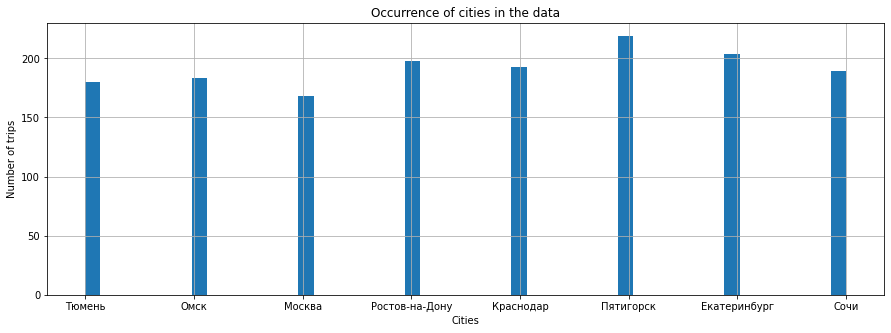

In [53]:
df_users['city'].hist(bins=50, figsize=(15,5))
plt.title('Occurrence of cities in the data')
plt.ylabel('Number of trips')
plt.xlabel('Cities')
plt.show()

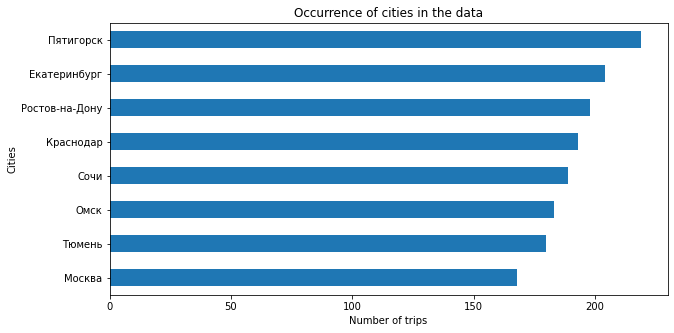

In [54]:
df_users['city'].value_counts().sort_values().plot(kind='barh', figsize=(10, 5))
plt.title('Occurrence of cities in the data')
plt.xlabel('Number of trips')
plt.ylabel('Cities')
plt.show()

The maximum - more than 220 users are located in Pyatigorsk, the minimum - in Moscow, about 170.

3.2 ratio of users with subscription and without subscription;

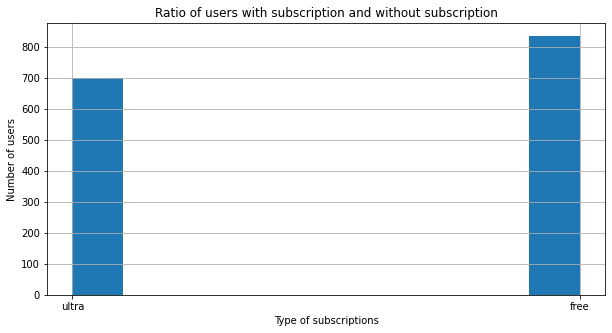

In [16]:
df_users['subscription_type'].hist(figsize=(10,5))
plt.title('Ratio of users with subscription and without subscription')
plt.ylabel('Number of users')
plt.xlabel('Type of subscriptions')
plt.show()

In [17]:
df_users.query('subscription_type == "free"').shape[0]/df_users.shape[0]

0.5443285528031291

In [18]:
df_users.query('subscription_type == "ultra"').shape[0]/df_users.shape[0]

0.4556714471968709

Пользователей с бесплатной подпиской - 54,4%, с платной- 45,6%. Выведем в круговой диаграмме:


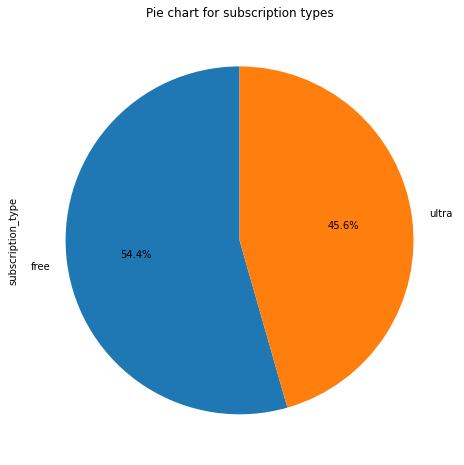

In [19]:
df_users['subscription_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Pie chart for subscription types')

plt.show()


3.3 Age of customers

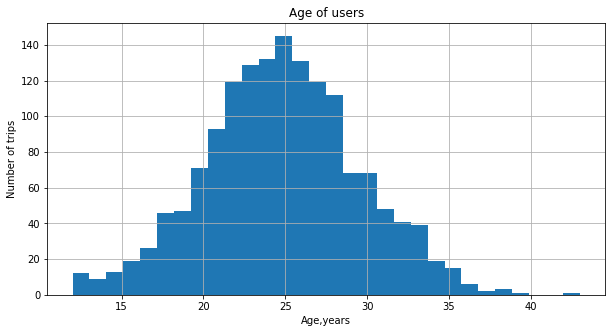

In [20]:
df_users['age'].hist(bins=30, figsize=(10,5))
plt.title('Age of users')
plt.ylabel('Number of trips')
plt.xlabel('Age,years')
plt.show()

The average user age ranges from 20 to 30 years.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

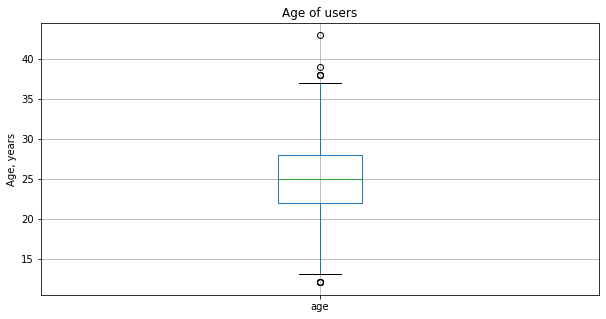

In [21]:
display(df_users['age'].describe())
df_users.boxplot(column='age', figsize=(10,5))
plt.title('Age of users')
plt.ylabel('Age, years')
plt.show()

The age of users is characterized by a normal distribution, with the maximum number of users (and average age) at the age of 25 years, the minimum age is 12 years, and the maximum is 43 years. The main range of users is from 20 to 30 years old. No anomalies are observed.

3.4 the distance the user has covered in one trip.

In [1]:
df_rides['distance'].hist(bins=50,figsize=(10,5))
plt.title('Distance per trip')
plt.ylabel('Number of trips')
plt.xlabel('Distance, m')
plt.show()

<class 'NameError'>: name 'df_rides' is not defined

Mostly users take scooters to travel from 2000m to 4500m with the highest being 3100m.

3.5 travel duration

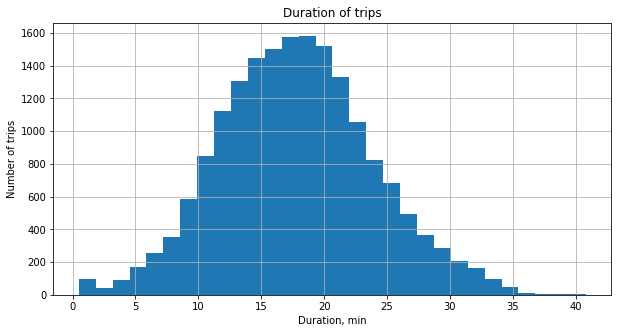

In [23]:
df_rides['duration'].hist(bins=30,figsize=(10,5))
plt.title('Duration of trips')
plt.ylabel('Number of trips')
plt.xlabel('Duration, min')
plt.show()

The average duration of trips ranges from 10 to 25 minutes, the maximum value is about 17 minutes.

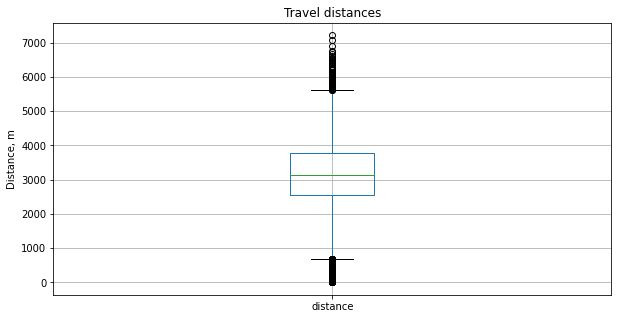

In [24]:
df_rides.boxplot(column='distance', figsize=(10,5))
df_rides['distance'].describe()
plt.title('Travel distances')
plt.ylabel('Distance, m')
plt.show()

The bulk of the trips take from 2500 to 3800 meters. Median 3133 meters. Trips over 5 km are rare. However, the graph shows that some users use scooters for short trips - up to 1500 m.

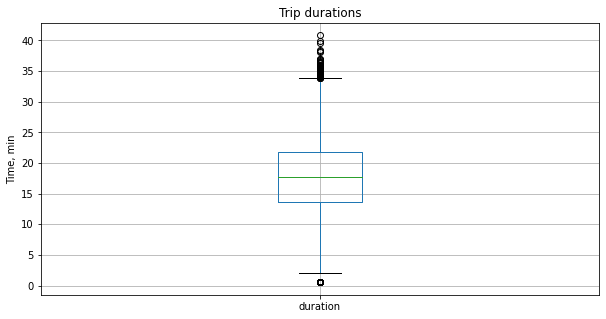

In [25]:
df_rides.boxplot(column='duration', figsize=(10,5))
df_rides['duration'].describe()
plt.title('Trip durations')
plt.ylabel('Time, min')
plt.show()

Duration of trips: Most trips are between 13 and 22 minutes, there is an anomaly close to zero - perhaps the trip was completed by mistake.

#### Step 4: Data merging

Let's check the dataset sizes

In [26]:
df_rides.shape


(18068, 5)

In [27]:
df_users.shape

(1534, 5)

Dataframes have different numbers of rows. Since we will be merging using 'user_id', it is necessary that the first dataset also contains all the unique id values from the second and there are no “extra” ones. After the merger, we will check to see if there are any gaps.

4.1 Let’s combine data about users, trips and subscriptions into one dataframe.

In [28]:
df_rides_merged = df_rides.merge(df_users, on='user_id')

df_rides_merged


,user_id,distance,duration,date,month_nr,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [29]:
df_rides_merged.shape

(18068, 9)

The original daframs have different sizes, the final one has the number of rows of the second table, the presence of gaps is checked below.

4.2 Create two more dataframes from df_rides_merged
with data about users without a subscription and with data about users with a subscription.

In [30]:
df_rides_merged_free = df_rides_merged.query('subscription_type == "free"')
df_rides_merged_paid = df_rides_merged.query('subscription_type == "ultra"')
                                          
display(df_rides_merged_paid.head())
df_rides_merged_free.head()


,user_id,distance,duration,date,month_nr,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


,user_id,distance,duration,date,month_nr,name,age,city,subscription_type
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free


Let's check for gaps:

In [31]:
display(df_rides_merged_paid.isna().sum())
df_rides_merged_free.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month_nr             0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id              0
distance             0
duration             0
date                 0
month_nr             0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

There are no gaps, merging dataframes can be considered correct.

4.3 We visualize information about distance and travel time for users of both categories.

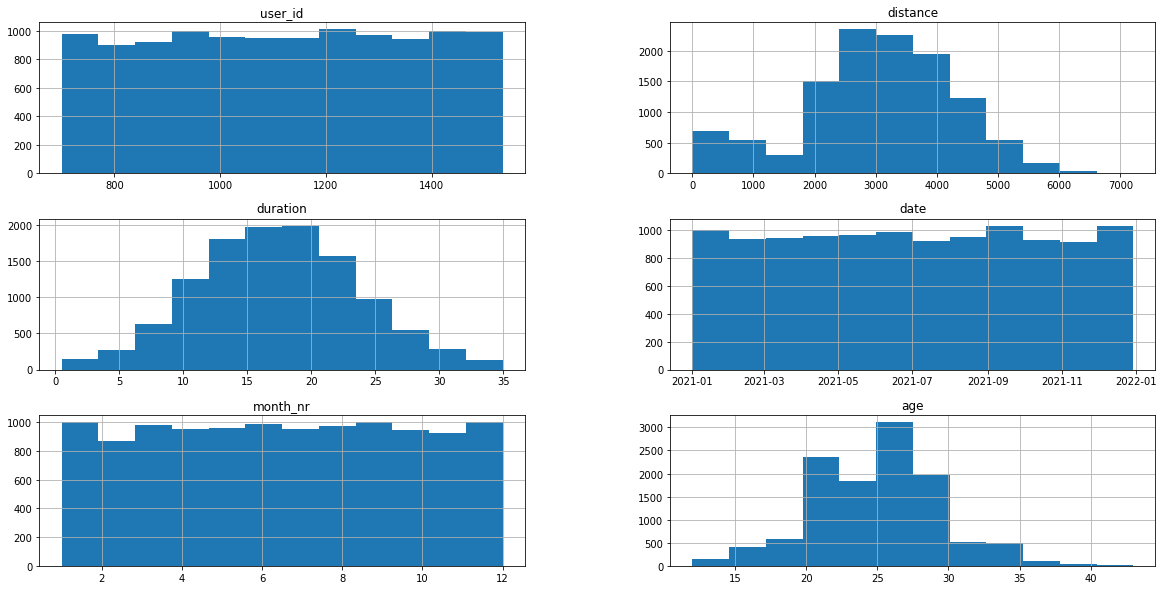

In [32]:
df_rides_merged_free.hist(figsize=(20,10), bins=12)
plt.show()

Among users with no subscription, the following can be emphasized:
     - travel distance 2000-4600m, maximum number of trips at 2500m
    
     - length of trips from 13 to 22 minutes in most and with the highest value 18 minutes
    
     - age from 20 to 28 years
    
     - approximately the same number of trips in each month of the year
    
    

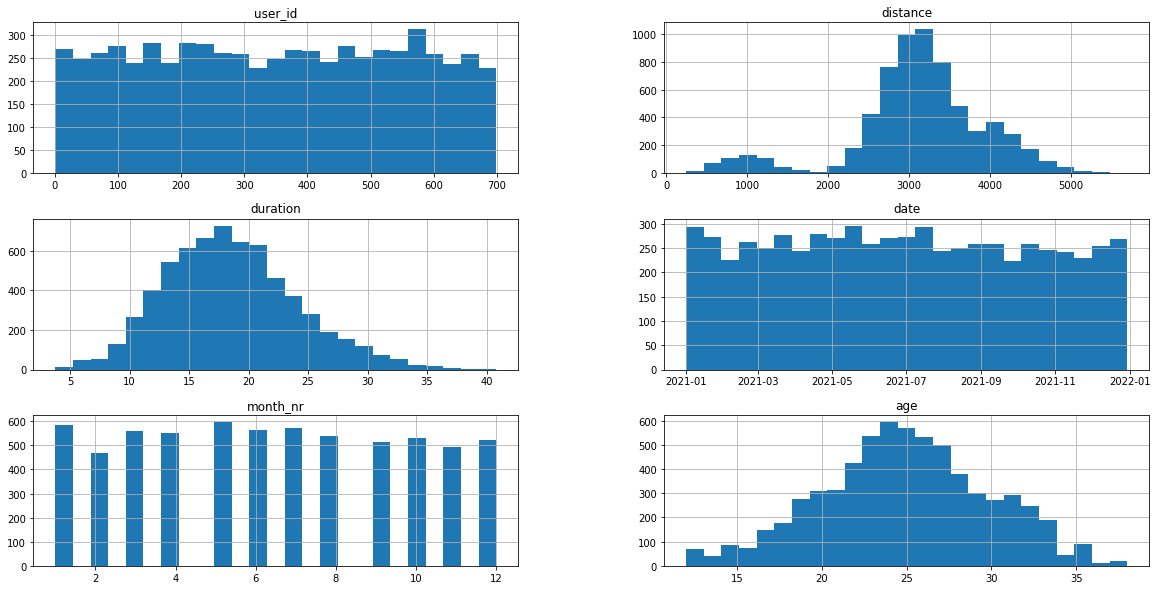

In [33]:
df_rides_merged_paid.hist(figsize=(20,10), bins=25)
plt.show()

Among users with a paid subscription, the following can be highlighted:

     - travel distance 2500-3700m, maximum number of trips at 2500m
    
     - length of trips from 12 to 22 minutes in most and with the highest value 18 minutes
    
     - age from 22 to 28 years
    
     - February has the least number of trips of the year, the largest in January and May.

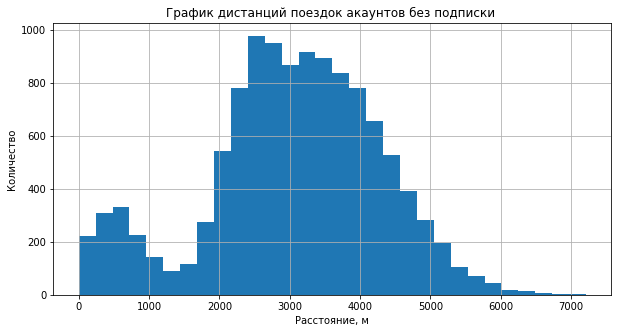

In [34]:
df_rides_merged_free['distance'].hist(figsize=(10,5), bins=30)
plt.title('График дистанций поездок акаунтов без подписки ')
plt.ylabel('Количество')
plt.xlabel('Расстояние, м')
plt.show()


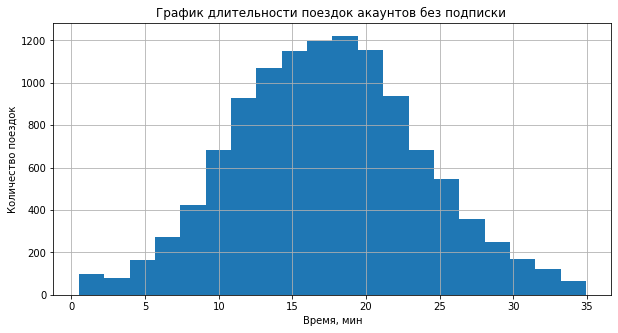

In [35]:
df_rides_merged_free['duration'].hist(figsize=(10,5), bins=20)
plt.title('График длительности поездок акаунтов без подписки ')
plt.ylabel('Количество поездок')
plt.xlabel('Время, мин')
plt.show()



Among users with no subscription, the following can be emphasized:

     - travel distance 2000-4600m, maximum number of trips at 2500m, however, the graph also includes an interval with trips up to 1200m
    
     - length of trips from 13 to 22 minutes in most and with the highest value 18 minutes
    

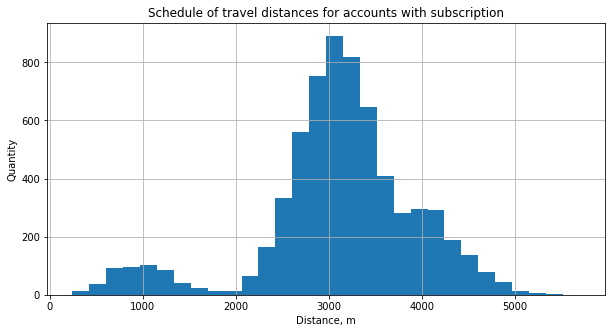

In [36]:
df_rides_merged_paid['distance'].hist(figsize=(10,5), bins=30)
plt.title('Schedule of travel distances for accounts with subscription')
plt.ylabel('Quantity')
plt.xlabel('Distance, m')
plt.show()

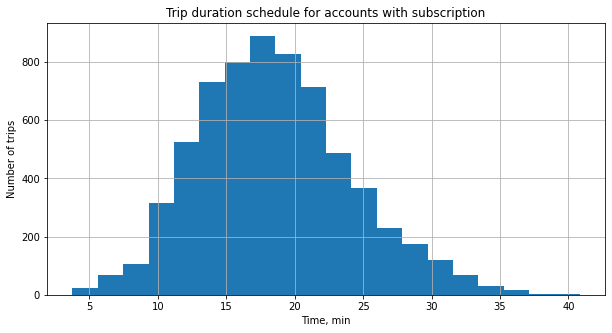

In [37]:
df_rides_merged_paid['duration'].hist(figsize=(10,5), bins=20)
plt.title('Trip duration schedule for accounts with subscription')
plt.ylabel('Number of trips')
plt.xlabel('Time, min')
plt.show()

Among users with a paid subscription, the following can be highlighted:

     - travel distance 2500-3700m, maximum number of trips at 3000m
    
     - length of trips from 12 to 22 minutes in most and with the largest value of 18 minutes
    

#### Step 5. Revenue calculation

5.1 Let’s create a dataframe with aggregated trip data based on the dataframe with combined data from step 4: find the total distance, number of trips and total time for each user for each month.

Let's round up the time of each trip to the nearest minute:


In [38]:
df_rides_merged_paid.loc[:,'duration'] = np.ceil(df_rides_merged_paid['duration'])
df_rides_merged_free.loc[:,'duration'] = np.ceil(df_rides_merged_free['duration'])      

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
df_rides_merged_free

,user_id,distance,duration,date,month_nr,name,age,city,subscription_type
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,20.0,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,22.0,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,19.0,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,17.0,2021-11-27,11,Альберт,25,Краснодар,free


In [40]:
# создаем новый датафрейм для пользователей с бесплатной подпиской
# сгруппируем таблицу по пользователям и по месяцам, суммируя значения для длительности и дальности поездок и считая кол-во поездок 
user_data_agg_free = df_rides_merged_free.pivot_table(
    index=['user_id','month_nr'], 
    values=['distance','duration','date'], 
    aggfunc={'distance':'sum', 'duration':'sum', 'date':'count'}
).rename(
    columns={'date': 'rides_total','distance': 'distance_total','duration':'duration_total'})

user_data_agg_free



rides_total  distance_total  duration_total
user_id month_nr                                             
700     1                   1     2515.690719            15.0
        2                   5    13446.659764            89.0
        3                   1     3798.334905            19.0
        4                   1     2984.551206            16.0
        6                   2     5927.650988            29.0
...                       ...             ...             ...
1534    6                   2     3409.468534            26.0
        8                   2     7622.453034            48.0
        9                   1     4928.173852            23.0
        11                  4    13350.015305            78.0
        12                  1     2371.711192            16.0

[6798 rows x 3 columns]

In [41]:
# создаем новый датафрейм для пользователей с платной подпиской
user_data_agg_paid = df_rides_merged_paid.pivot_table(
    index=['user_id','month_nr'],
    values=['distance','duration','date'],                                                      
    aggfunc={'distance':'sum', 'duration':'sum', 'date':'count'}
).rename(
    columns={'date': 'rides_total','distance': 'distance_total','duration':'duration_total'})

user_data_agg_paid

rides_total  distance_total  duration_total
user_id month_nr                                             
1       1                   2     7027.511294            42.0
        4                   1      754.159807             7.0
        8                   2     6723.470560            46.0
        10                  2     5809.911100            32.0
        11                  3     7003.499363            56.0
...                       ...             ...             ...
699     6                   1     4072.797406            17.0
        8                   2     7018.324143            45.0
        9                   2     6364.861911            31.0
        10                  1     4707.845501            16.0
        12                  1     3202.890770            26.0

[4533 rows x 3 columns]

5.2 In the same dataframe, for each type of subscription, we will add a column with the monthly revenue brought in by each user.


In [42]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
#user_data_agg_free['duration_total'] = np.ceil(user_data_agg_free['duration_total'])
#user_data_agg_paid['duration_total'] = np.ceil(user_data_agg_paid['duration_total'])
# добавим столбец с помесячной выручкой
#Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.  
#без платной подписки условия следующие

price_per_minute_free = 8
price_start_free = 50
#с подпиской
subscription_fee_paid = 199
price_per_minute_paid = 6
price_start_paid = 0


# добавим столбец с помесячной выручкой
user_data_agg_free['revenue'] = price_start_free*user_data_agg_free['rides_total'] + price_per_minute_free*user_data_agg_free['duration_total']

user_data_agg_paid['revenue'] = subscription_fee_paid + price_start_paid*user_data_agg_paid['rides_total'] + price_per_minute_paid*user_data_agg_paid['duration_total']


display(user_data_agg_free.head(20))
user_data_agg_paid.head(20)


rides_total  distance_total  duration_total  revenue
user_id month_nr                                                      
700     1                   1     2515.690719            15.0    170.0
        2                   5    13446.659764            89.0    962.0
        3                   1     3798.334905            19.0    202.0
        4                   1     2984.551206            16.0    178.0
        6                   2     5927.650988            29.0    332.0
        7                   2     4399.206279            21.0    268.0
        8                   1     4071.654669            17.0    186.0
        10                  2     6322.578618            44.0    452.0
        11                  3     8735.782625            32.0    406.0
701     1                   1     2676.472894            18.0    194.0
        2                   2     5637.334007            27.0    316.0
        3                   1     2802.021357            17.0    186.0
        4                   1     3509.012965            14.0    162.0
        5                   1     2465.852577            15.0    170.0
        6                   2     4634.620760            26.0    308.0
        7                   4    12970.722682            66.0    728.0
        8                   2     7628.751294            19.0    252.0
        9                   2     8659.573699            33.0    364.0
        10                  2     8395.260013            44.0    452.0
        12                  2     2773.396606            23.0    284.0

rides_total  distance_total  duration_total  revenue
user_id month_nr                                                      
1       1                   2     7027.511294            42.0    451.0
        4                   1      754.159807             7.0    241.0
        8                   2     6723.470560            46.0    475.0
        10                  2     5809.911100            32.0    391.0
        11                  3     7003.499363            56.0    535.0
        12                  2     6751.629942            28.0    367.0
2       3                   3    10187.723006            63.0    577.0
        4                   2     6164.381824            40.0    439.0
        6                   1     3255.338202            14.0    283.0
        7                   2     6780.722964            48.0    487.0
        8                   1      923.007439             7.0    241.0
        10                  1     2824.636598            19.0    313.0
        12                  1     3828.248580            12.0    271.0
3       1                   1     3061.777147            13.0    277.0
        2                   2     5421.152016            39.0    433.0
        4                   1     2956.651632            21.0    325.0
        5                   3     9064.026918            63.0    577.0
        7                   3    10919.595403            67.0    601.0
        9                   1     2891.012822            23.0    337.0
        12                  1     2593.381928            13.0    277.0

We collected two dataframes for each type of subscription with the total duration and distance of trips, the number of trips and the total cost of trips for each month.

#### Step 6. Testing hypotheses

**Task 6.1** It is important to understand whether users with a subscription spend more time traveling? If so, then users with a subscription may be “more profitable” for the company. We need to test the hypothesis. We use the original data on the duration of each session - separately for subscribers and those who do not have a subscription.

H0 (null hypothesis) - the average duration of trips of users with a subscription and users without a subscription are equal.
H1 (alternative hypothesis) - users with a subscription spend more time traveling.

Let's use the method to test the hypothesis that the mean of two populations is equal (two-sample t-test for independent samples), using the argument alternative = 'greater':

In [43]:
alpha = 0.05

results = st.ttest_ind( df_rides_merged_paid['duration'],  df_rides_merged_free['duration'] ,  alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
   

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


The P-value turned out to be very small, which means the null hypothesis is not true. There is reason to believe that users of paid accounts travel longer. Let's also compare the average values of the corresponding columns:

In [44]:
df_rides_merged_paid['duration'].mean() > df_rides_merged_free['duration'].mean()


True

We conclude that the average trips of paid accounts are longer than those of free ones.

**Task 6.2** The distance of one trip is 3130 meters - optimal from the point of view of scooter wear. Is it possible to say that the average distance traveled by users with a subscription in one trip does not exceed 3130 meters?

Null (left-sided) hypothesis H0 - average df_rides_merged_paid['distance'] =3130 m.

An alternative hypothesis is that the average distance is less than 3130 m.
We apply a one-sample left-tailed test on whether the population mean is equal to the number.

In [45]:
average_distance = 3130  #среднее значение, которое проезжают пользователи с подпиской.
alpha = 0.05             #уровень статистической значимости

results = st.ttest_1samp(
    df_rides_merged_paid['distance'],
    average_distance,
      alternative='less')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: расстояние меньше 3130')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние очень близко 3130')
    

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу: расстояние очень близко 3130


It was not possible to reject the null hypothesis: the distance is very close 3130

The P-value is quite large (~8%), which means that the equality in the null hypothesis is close to the truth. Let's look at the average average trip among users with a paid subscription.

In [46]:
df_rides_merged_paid['distance'].mean()

3115.4453880370247

Here it turns out that the distance is less than 3130 m. We can say that the distance traveled by users with a subscription in one trip does not exceed the optimal one.

Null (left-sided) hypothesis H0 - average df_rides_merged_paid['distance'] =3130 m.

An alternative hypothesis is that the average distance is greater than 3130 m - since we are interested in the critical interval, that is, above the optimal one.
We apply a one-sample right-tailed test on whether the population mean is equal to the number.

In [47]:
average_distance = 3130  #среднее значение, которое проезжают пользователи с подпиской.
alpha = 0.05             #уровень статистической значимости

results = st.ttest_1samp(
    df_rides_merged_paid['distance'],
    average_distance,
      alternative='greater')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: расстояние больше 3130')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние очень близко 3130')
    
    

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние очень близко 3130


It was not possible to reject the null hypothesis: the distance is very close 3130

We can say that the distance traveled by users with a subscription in one trip does not exceed the optimal one.

**Task 6.3** Test the hypothesis about whether monthly revenue from users with a monthly subscription will be higher
than revenue from non-subscription users.

Null hypothesis: Monthly revenue from users with a monthly subscription is equal to revenue from users without a subscription.

Alternative hypothesis: Monthly revenue from users with a monthly subscription is **higher**,
than revenue from non-subscription users.



In [48]:
alpha = 0.05    #  уровень статистической значимости

results = st.ttest_ind( user_data_agg_paid['revenue'], user_data_agg_free['revenue'] ,  alternative = 'greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу') 
else:
    
    print('Не получилось отвергнуть нулевую гипотезу') 
    

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


We reject the null hypothesis in favor of the alternative - monthly revenue from paid accounts is higher than that of free ones.

In [49]:
user_data_agg_paid['revenue'].mean() > user_data_agg_free['revenue'].mean()


True

Conclusion: Users with a subscription drive longer distances than users without a subscription, and they generate more profit on average per month.

**Conclusion**.
Data was provided from scooter rental service GoFast from several cities, including data on duration, distance, cost of the trip and type of subscription (free/ultra). After reviewing the data, duplicates were removed and the data type was converted to time. Next, the data was divided into two categories, depending on the type of subscription and collected by month.
Hypotheses for carrying out the action were tested.
Based on the tests performed, we can conclude that:


- users of paid subscriptions spend more time traveling.
- the average travel distance of a user with a subscription does not exceed 3130m.
- Subscribed users bring in more revenue.

Recommendation for business: Promotions should be carried out aimed at increasing the number of paid accounts.


#### Step 7. Distributions. 

7.1 The GoFast marketing department was given a task: they need to hold a promotion with the distribution of promotional codes for one free month of subscription, within which at least 100 existing customers must renew this subscription.


That is, at the end of the subscription period, the user can either cancel it or renew it by making the appropriate payment.


This promotion has already been carried out previously and as a result it turned out that after the free trial period the subscription is extended
10% of users.
Find out what minimum number of promotional codes you need to send out so that the probability of not fulfilling the plan is approximately 5%.

Select the parameters of the distribution that describes this situation, construct a distribution graph and formulate an answer to the question about the number of promotional codes.

**Solution:** This situation is described by the binomial distribution.
Considering from past experience that after a free trial period, 10% of users renew their subscription, then to attract at least 100 new subscriptions, you need to send out at least 10 * 100 = 1000 coupons.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Количество купонов для рассылки, как минимум: 1164


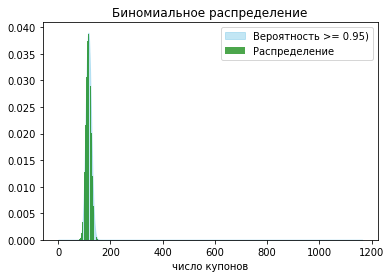

In [50]:
from scipy.stats import binom, norm

min_probability = 0.95  # минимальная вероятность выполнения плана

p = 0.1  # вероятность подписки после акции
goal = 100 #цель по новым подпискам



n = 1000  # изначальное число промокодов

while True:
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))

    #кумулятивная вероятность 
    cumulative_prob = 1 - norm.cdf(goal - 0.5, mu, sigma)

    if cumulative_prob >= min_probability:
        break # выходим из цикла, если желаемая вероятность достигнута

    n += 1  


x_values = np.arange(0, n+1)
plt.bar(x_values, binom.pmf(x_values, n, p), label='Распределение', alpha=0.7, color='green')

# покажем начало выполнения условия
plt.fill_between(x_values, binom.pmf(x_values, n, p), where=(x_values >= min_probability), color='skyblue', alpha=0.5, label=f'Вероятность >= {min_probability})')


plt.title('Биномиальное распределение')
plt.xlabel('число купонов')
plt.legend()
plt.rcParams["figure.figsize"] = (25,10 )


print(f"Количество купонов для рассылки, как минимум: {n}")
plt.show()

**Conclusion:** It is necessary to send out at least 1164 coupons in order for 100 people to renew their subscription with a 95% probability.

Решение: Эту ситуацию так же можно описать биномиальным распределением. Так как вероятность близка к 40%, можно воспользоваться нормальной аппроксимацией биномильного распределения. 

In [51]:

p = 0.4 # вероятность открытия уведомления
n = 1000000 #количество уведомлений


mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(result)

0.15371708296369768


The probability of achieving less than 399.5 thousand discoveries is 15%. It might be worth increasing the number of notifications. Let's plot the normal distribution:

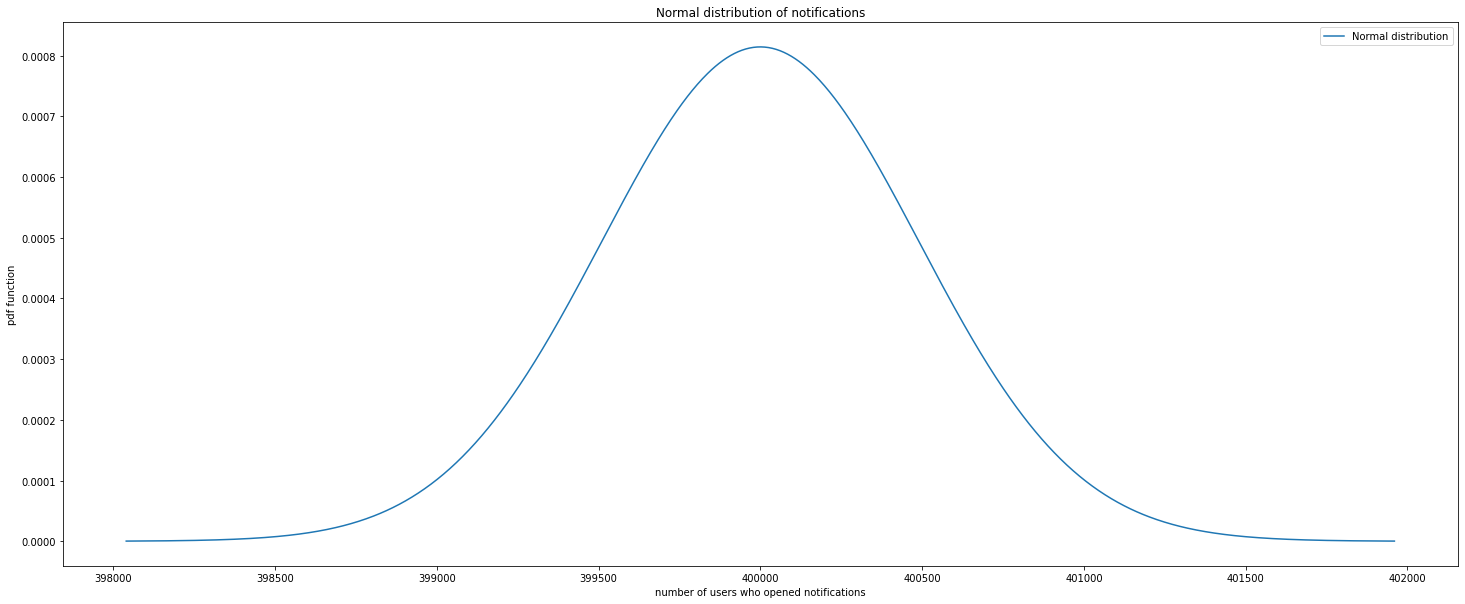

In [52]:
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x_values, norm.pdf(x_values, mu, sigma), label='Normal distribution')

plt.title('Normal distribution of notifications')
plt.xlabel('number of users who opened notifications')
plt.ylabel('pdf function')


plt.legend()
plt.show()

Conclusion: you need to increase the number of notifications to reduce the critical zone (currently 15%)

###   Conclusion
Data was provided from scooter rental service GoFast from several cities, including data on duration, distance, cost of the trip and type of subscription (free/ultra). After reviewing the data, duplicates were removed and the data type was converted to time. Next, the data was divided into two categories, depending on the type of subscription and collected by month. Afterwards, the monthly revenue for each user was calculated and the data was aggregated by subscription type.


Hypotheses for carrying out the action were tested.
Based on the tests performed, we can conclude that:


- users of paid subscriptions spend more time traveling.
- the average travel distance of a user with a subscription does not exceed 3130m.
- Subscribed users bring in more revenue.

Recommendation for business: Promotions should be carried out aimed at increasing the number of paid accounts.
